# Kaggle Steel Plate Defect Prediction

### Data Source: https://www.kaggle.com/competitions/playground-series-s4e3

This is a mutliclass classification problem where the reponse variable is a type of defect

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Initial Setup

In [3]:
train = pd.read_csv("kaggle/input/train.csv")
test = pd.read_csv("kaggle/input/test.csv")

In [4]:
trainforconcat = train.copy()
trainforconcat["train"] = 1
testforconcat = test.copy()
testforconcat["train"] = 0

all_data = pd.concat([trainforconcat, testforconcat]) # setting up a dataframe which makes it easier to transform all of the data ahead of test train split

In [5]:
train.drop("id", axis = 1, inplace = True) # removing id col

# EDA

In [6]:
def iszero(x):
    if x == 0:
        return 1
    else:
        return 0

def create_x_min_zero(df):
    df["Xmin_zero"] = df["X_Minimum"].apply(iszero)

create_x_min_zero(train) # create new column where X_Minimum is 0

In [7]:
targets = ["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]

In [8]:
targets = ["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]
target_mapping = {"Pastry": 1, "Z_Scratch": 2, "K_Scatch": 3, "Stains": 4, "Dirtiness": 5, "Bumps": 6, "Other_Faults": 7}

def create_target(df):
    df['target'] = 0
    for target in targets:
        df['target'] = np.where(df[target] == 1, target_mapping[target], df['target'])
    return df

create_target(train) # creating separate columns for the multilabel targets

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,Xmin_zero,target
0,584,590,909972,909977,16.0,8.0,5.0,2274.0,113.0,140.0,...,0.1417,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,4
1,808,816,728350,728372,433.0,20.0,54.0,44478.0,70.0,111.0,...,0.9491,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,7
2,39,192,2212076,2212144,11388.0,705.0,420.0,1311391.0,29.0,141.0,...,1.0000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,3
3,781,789,3353146,3353173,210.0,16.0,29.0,3202.0,114.0,134.0,...,0.4025,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,3
4,1540,1560,618457,618502,521.0,72.0,67.0,48231.0,82.0,111.0,...,0.9998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,1121,1135,422864,422886,176.0,17.0,22.0,18656.0,104.0,127.0,...,0.4366,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,6
6450,1321,1332,2066684,2066548,221.0,25.0,37.0,24476.0,110.0,132.0,...,0.6839,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,7
6451,1563,1582,2039121,2039135,56.0,28.0,10.0,5714.0,95.0,127.0,...,0.2173,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,6
6452,444,441,1248676,1248687,111.0,18.0,17.0,11998.0,104.0,126.0,...,0.2583,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2


In [9]:
train['target'].value_counts()

target
7    2244
6    1583
3    1144
1     483
2     379
0     276
4     180
5     165
Name: count, dtype: int64

In [10]:
def create_ranges(data):
    data["X_range"] = data["X_Maximum"] - data["X_Minimum"]
    data["Y_range"] = data["Y_Maximum"] - data["Y_Minimum"]
    data["Lum_range"] = data["Maximum_of_Luminosity"] - data["Minimum_of_Luminosity"]

create_ranges(train) # creating new features out of the range of X, Y and Luminosity

In [11]:
train.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,Xmin_zero,target,X_range,Y_range,Lum_range
0,584,590,909972,909977,16.0,8.0,5.0,2274.0,113.0,140.0,...,0.0,1.0,0.0,0.0,0.0,0,4,6,5,27.0
1,808,816,728350,728372,433.0,20.0,54.0,44478.0,70.0,111.0,...,0.0,0.0,0.0,0.0,1.0,0,7,8,22,41.0
2,39,192,2212076,2212144,11388.0,705.0,420.0,1311391.0,29.0,141.0,...,1.0,0.0,0.0,0.0,0.0,0,3,153,68,112.0
3,781,789,3353146,3353173,210.0,16.0,29.0,3202.0,114.0,134.0,...,1.0,0.0,0.0,0.0,0.0,0,3,8,27,20.0
4,1540,1560,618457,618502,521.0,72.0,67.0,48231.0,82.0,111.0,...,0.0,0.0,0.0,0.0,1.0,0,7,20,45,29.0


In [12]:
print(train.columns)

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults', 'Xmin_zero', 'target', 'X_range',
       'Y_range', 'Lum_range'],
      dtype='object')


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              6454 non-null   int64  
 1   X_Maximum              6454 non-null   int64  
 2   Y_Minimum              6454 non-null   int64  
 3   Y_Maximum              6454 non-null   int64  
 4   Pixels_Areas           6453 non-null   float64
 5   X_Perimeter            6453 non-null   float64
 6   Y_Perimeter            6453 non-null   float64
 7   Sum_of_Luminosity      6453 non-null   float64
 8   Minimum_of_Luminosity  6453 non-null   float64
 9   Maximum_of_Luminosity  6453 non-null   float64
 10  Length_of_Conveyer     6453 non-null   float64
 11  TypeOfSteel_A300       6453 non-null   float64
 12  TypeOfSteel_A400       6453 non-null   float64
 13  Steel_Plate_Thickness  6453 non-null   float64
 14  Edges_Index            6453 non-null   float64
 15  Empt

In [14]:
train.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,Xmin_zero,target,X_range,Y_range,Lum_range
count,6454.000000,6454.000000,6.454000e+03,6.454000e+03,6453.000000,6453.000000,6453.000000,6.453000e+03,6453.000000,6453.000000,...,6453.000000,6453.000000,6453.000000,6453.000000,6453.000000,6454.000000,6454.000000,6454.000000,6.454000e+03,6453.000000
mean,707.297180,751.065231,1.850815e+06,1.844514e+06,1667.403533,94.314892,63.536960,1.889558e+05,84.712692,128.643422,...,0.178367,0.027894,0.025570,0.245312,0.347745,0.016734,4.868919,43.768051,-6.300510e+03,43.930730
std,529.665885,498.264039,1.917597e+06,1.903037e+06,3452.003515,165.947038,99.021046,4.221105e+05,28.467832,14.234303,...,0.382851,0.164682,0.157859,0.430306,0.476292,0.128282,2.269708,77.201361,5.073091e+05,26.581648
min,0.000000,4.000000,6.712000e+03,1.120000e+03,6.000000,3.000000,1.000000,2.550000e+02,0.000000,71.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1102.000000,-1.231342e+07,-54.000000
25%,48.000000,214.000000,6.594760e+05,6.575020e+05,91.000000,15.000000,14.000000,9.956000e+03,69.000000,124.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,10.000000,1.100000e+01,25.000000
50%,775.500000,795.500000,1.388373e+06,1.388351e+06,169.000000,25.000000,24.000000,1.850300e+04,90.000000,127.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,14.000000,2.000000e+01,34.000000
75%,1145.000000,1159.000000,2.339660e+06,2.339660e+06,659.000000,67.000000,62.000000,6.925800e+04,105.000000,134.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,7.000000,28.000000,5.300000e+01,54.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,37376.000000,1193.000000,903.000000,1.159141e+07,196.000000,252.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1290.000000,9.611085e+06,187.000000


In [15]:
train.dtypes

X_Minimum                  int64
X_Maximum                  int64
Y_Minimum                  int64
Y_Maximum                  int64
Pixels_Areas             float64
X_Perimeter              float64
Y_Perimeter              float64
Sum_of_Luminosity        float64
Minimum_of_Luminosity    float64
Maximum_of_Luminosity    float64
Length_of_Conveyer       float64
TypeOfSteel_A300         float64
TypeOfSteel_A400         float64
Steel_Plate_Thickness    float64
Edges_Index              float64
Empty_Index              float64
Square_Index             float64
Outside_X_Index          float64
Edges_X_Index            float64
Edges_Y_Index            float64
Outside_Global_Index     float64
LogOfAreas               float64
Log_X_Index              float64
Log_Y_Index              float64
Orientation_Index        float64
Luminosity_Index         float64
SigmoidOfAreas           float64
Pastry                   float64
Z_Scratch                float64
K_Scatch                 float64
Stains    

In [16]:
targets = ["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]

for target in targets:
    print(train.corr()[target].abs().sort_values(ascending = False).head(5))
    print("") # bivariate analysis. printing out correlations.

Pastry                  1.000000
target                  0.485116
Orientation_Index       0.246905
Outside_Global_Index    0.220545
Other_Faults            0.207687
Name: Pastry, dtype: float64

Z_Scratch           1.000000
target              0.315936
TypeOfSteel_A300    0.183228
TypeOfSteel_A400    0.183138
Other_Faults        0.182391
Name: Z_Scratch, dtype: float64

K_Scatch           1.000000
Outside_X_Index    0.783657
Log_X_Index        0.783182
Pixels_Areas       0.759030
LogOfAreas         0.751905
Name: K_Scatch, dtype: float64

Stains            1.000000
Log_Y_Index       0.289224
LogOfAreas        0.249927
SigmoidOfAreas    0.211308
Edges_X_Index     0.200082
Name: Stains, dtype: float64

Dirtiness            1.000000
Orientation_Index    0.159394
Square_Index         0.140962
Other_Faults         0.118279
Edges_X_Index        0.116499
Name: Dirtiness, dtype: float64

Bumps           1.000000
Other_Faults    0.416292
target          0.284031
K_Scatch        0.264699
LogOfAr

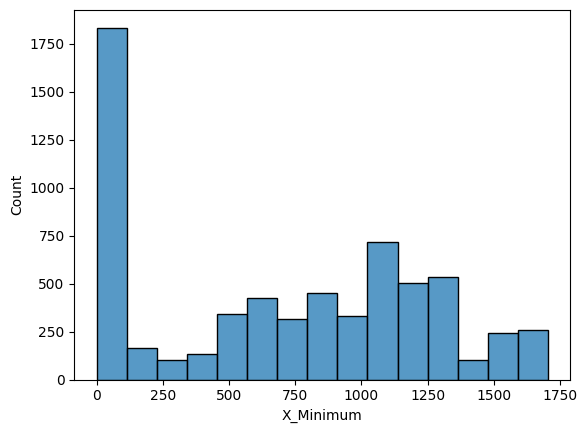

In [17]:
graph = True # univariate analysis. plotting out histogram.

if graph:
    sns.histplot(data=train, x='X_Minimum')
    plt.show()

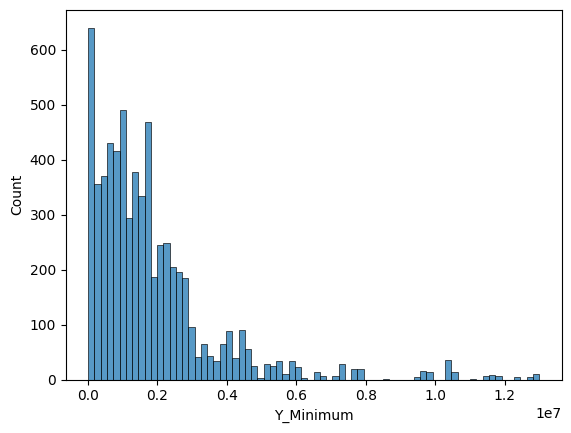

In [18]:
if graph: # univariate analysis. plotting out histogram.
    sns.histplot(data=train, x='Y_Minimum')

In [19]:
def create_centre_vars(df):
    df["X_centre"] = (df["X_Minimum"] + df["X_Maximum"]) / 2
    df["Y_centre"] = (df["Y_Minimum"] + df["Y_Maximum"]) / 2 # creating new feature of the centre X and Y points

create_centre_vars(train)

In [20]:
meansforplot = train.copy()
meansforplot["X_centre_mean"] = train.groupby("target")["X_centre"].transform("mean")
meansforplot["Y_centre_mean"] = train.groupby("target")["Y_centre"].transform("mean") # more feature engineering. mean target encoding

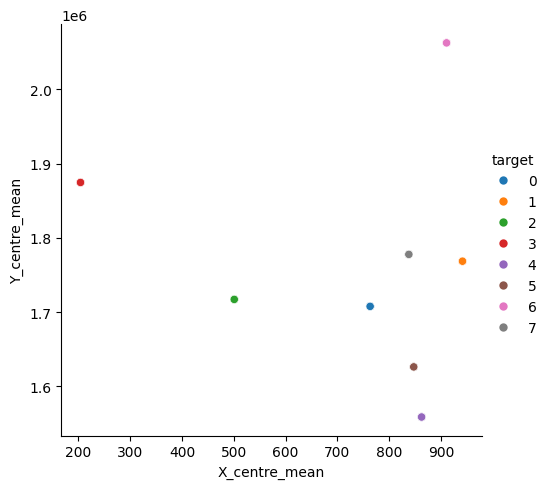

In [21]:
if graph: # more data viz

    sns.relplot(data = meansforplot, x = "X_centre_mean", y = "Y_centre_mean", hue = "target", palette = "tab10")

In [22]:
train.groupby("Xmin_zero").mean()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Stains,Dirtiness,Bumps,Other_Faults,target,X_range,Y_range,Lum_range,X_centre,Y_centre
Xmin_zero,,,,,,,,,,,,,,,,,,,,,
0,719.334384,763.483139,1.859017e+06,1.852541e+06,1675.898976,94.730969,63.521513,189502.824271,84.746257,128.735382,...,0.028369,0.025847,0.247124,0.345942,4.872833,44.148755,-6475.732430,43.989125,741.408761,1.855779e+06
1,0.000000,21.398148,1.368854e+06,1.372850e+06,1168.296296,69.870370,64.444444,156818.787037,82.740741,123.240741,...,0.000000,0.009259,0.138889,0.453704,4.638889,21.398148,3995.453704,40.500000,10.699074,1.370852e+06


# More EDA

In [23]:
# distribution of EVERY column (warning, resource intense)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

train_notarget = train.drop(columns=targets)
num_cols = len(train_notarget.columns)

graph = False

if graph:
    num_rows = num_cols // 3 if num_cols % 3 == 0 else num_cols // 3 + 1  # Adjusted for 3 columns per row

    # Create subplots
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))  # Adjusted for 3 columns

    # Flatten axes for easy iteration
    axes = axes.flatten()

    for i, col in enumerate(train_notarget.columns):
        data_no_outliers = train_notarget[col]
        sns.histplot(data_no_outliers, ax=axes[i], kde=True)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)


    for i in range(num_cols, num_rows * 3):  # Adjusted for 3 columns
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

In [24]:
def conveyor_cat(x): # creating a binary dummy variable for conveyor being a long length
    if x >= 1500:
        return 1
    else:
        return 0

def create_conveyor_cat(df):
    df['Long_conveyer'] = df['Length_of_Conveyer'].apply(conveyor_cat)


def near_1(x): # creating a dummy variable for a value being close to 1
    if x > 0.95:
        return 1
    else:
        return 0

def create_highsigmoid(df):
    df['HighSigmoid'] = df['SigmoidOfAreas'].apply(near_1)

def create_highYedge(df):
    df['highYedge'] = df['Edges_Y_Index'].apply(near_1)

def create_highOutsideGlobal(df):
    df['HighOutsideGlobal'] = df['Outside_Global_Index'].apply(near_1)

create_conveyor_cat(train)

create_highsigmoid(train)

create_highYedge(train)

create_highOutsideGlobal(train)

<Axes: xlabel='Outside_Global_Index', ylabel='Count'>

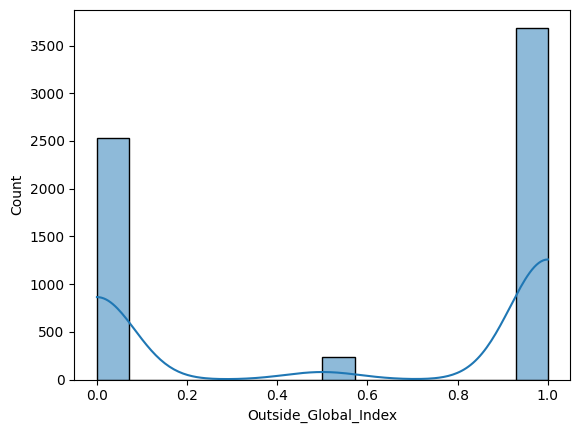

In [25]:
sns.histplot(train['Outside_Global_Index'], kde=True)

In [26]:
print(train[["TypeOfSteel_A300", "TypeOfSteel_A400"]].head())
# can drop because if A300 = 1 then A400 = 0

train[train["TypeOfSteel_A300"] == train["TypeOfSteel_A400"]].shape[0]

   TypeOfSteel_A300  TypeOfSteel_A400
0               0.0               1.0
1               1.0               0.0
2               0.0               1.0
3               0.0               1.0
4               0.0               1.0


1

# Preprocessing

### No NA values to drop or impute

In [27]:
all_data_unengineered = all_data.copy()


In [28]:
create_x_min_zero(all_data)
create_ranges(all_data)
create_centre_vars(all_data)
create_conveyor_cat(all_data)
create_highsigmoid(all_data)
create_highYedge(all_data)
create_highOutsideGlobal(all_data)

In [29]:
all_data_unengineered.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults', 'train'],
      dtype='object')

In [30]:
all_data.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults', 'train', 'Xmin_zero', 'X_range',
       'Y_range', 'Lum_range', 'X_centre', 'Y_centre', 'Long_conveyer',
       'HighSigmoid', 'highYedge', 'HighOutsideGlobal'],
      dtype='object')

In [31]:
from sklearn.utils import shuffle
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
import tensorflow as tf

In [61]:
# converting columns to correct datatypes

catcols = []
contcols = []

for col in all_data.columns:
    if all_data[col].nunique() < 20:
        all_data[col] = pd.Categorical(all_data[col])
        catcols.append(col)
    else:
        all_data[col] = pd.to_numeric(all_data[col])
        contcols.append(col)

catcolsOG = []
contcolsOG = []

for col in all_data_unengineered.columns:
    if all_data_unengineered[col].nunique() < 20:
        all_data_unengineered[col] = pd.Categorical(all_data_unengineered[col])
        catcolsOG.append(col)
    else:
        all_data_unengineered[col] = pd.to_numeric(all_data_unengineered[col])
        contcolsOG.append(col)

In [33]:
# converting columns to correct datatypes

for col in catcols:
    all_data[col] = pd.Categorical(all_data[col])

for col in contcols:
    all_data[col] = pd.Categorical(all_data[col])


for col in catcolsOG:
    all_data_unengineered[col] = pd.Categorical(all_data_unengineered[col])

for col in contcolsOG:
    all_data_unengineered[col] = pd.Categorical(all_data_unengineered[col])

In [34]:
print(set(all_data_unengineered.columns) - set(all_data.columns))
print(set(all_data.columns) - set(all_data_unengineered.columns)) # verifying new columns

set()
{'HighSigmoid', 'highYedge', 'X_range', 'Y_range', 'Long_conveyer', 'Xmin_zero', 'HighOutsideGlobal', 'Y_centre', 'Lum_range', 'X_centre'}


In [35]:
train_data = all_data[all_data['train'] == 1]
train_data_unengineered = all_data_unengineered[all_data_unengineered['train'] == 1]

In [36]:
train_data[targets]

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
6449,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6450,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6451,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6452,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [37]:
train_data_unengineered[targets]

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
6449,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6450,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6451,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6452,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [38]:
dropcols = targets[:]
dropcols.append("id")
dropcols.append("target")
dropcols_OG = dropcols[:]
dropcols_OG.remove('target')

create_target(train_data)
create_target(train_data_unengineered)
X = train_data.drop(dropcols, axis = 1) # dropping all target variables


originalcols = pd.read_csv("kaggle/input/test.csv").columns
X_OG = train_data_unengineered.drop(dropcols_OG, axis = 1)
Y = train_data[['target']]

<ipython-input-8-112e71021154>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = 0
<ipython-input-8-112e71021154>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = np.where(df[target] == 1, target_mapping[target], df['target'])
<ipython-input-8-112e71021154>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [39]:
print(set(train_data.columns) - set(train_data_unengineered.columns))
print(set(train_data_unengineered.columns) - set(train_data.columns)) # verifying columns

{'HighSigmoid', 'highYedge', 'X_range', 'Y_range', 'Long_conveyer', 'Xmin_zero', 'HighOutsideGlobal', 'Y_centre', 'Lum_range', 'X_centre'}
set()


In [40]:
print(set(X.columns) - set(X_OG.columns))
print(set(X_OG.columns) - set(X.columns))

{'HighSigmoid', 'highYedge', 'X_range', 'Y_range', 'Long_conveyer', 'Xmin_zero', 'HighOutsideGlobal', 'Y_centre', 'Lum_range', 'X_centre'}
{'target'}


In [41]:
train_data['target'].value_counts() # double checking distribution of target variable

target
7    2244
6    1583
3    1144
1     483
2     379
0     276
4     180
5     165
Name: count, dtype: int64

In [42]:
print(tf.__version__)

2.15.0


In [43]:
Y

,target
0,4
1,7
2,3
3,3
4,7
...,...
6449,6
6450,7
6451,6
6452,2


In [44]:
X = pd.get_dummies(X, drop_first = True)
X_OG = pd.get_dummies(X_OG, drop_first = True)

l_encode = LabelEncoder()
l_encode.fit(Y)
Y = l_encode.transform(Y)
Y = to_categorical(Y)


#removing the '0' cateogry so that all of the other array values are just 0

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [45]:
Y = [subarr[1:] for subarr in Y]

In [46]:
Y[0]

array([0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [47]:
lens = [len(subarr) for subarr in Y]
print(set(lens)) # ensuring the multilabel outputs are in the right form

{7}


In [48]:
Y[1]

array([0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [49]:
X.columns

Index(['X_Minimum_1', 'X_Minimum_2', 'X_Minimum_3', 'X_Minimum_4',
       'X_Minimum_5', 'X_Minimum_6', 'X_Minimum_7', 'X_Minimum_8',
       'X_Minimum_9', 'X_Minimum_10',
       ...
       'Y_centre_12725297.5', 'Y_centre_12806507.5', 'Y_centre_12917036.5',
       'Y_centre_12917063.5', 'Y_centre_12920611.5', 'Y_centre_12987676.5',
       'Long_conveyer_1', 'HighSigmoid_1', 'highYedge_1',
       'HighOutsideGlobal_1'],
      dtype='object', length=31235)

## Test Train Split

In [50]:
X_train,X_test, Y_train, Y_test  = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train_OG,X_test_OG, Y_train_OG, Y_test_OG  = train_test_split(X_OG, Y, test_size=0.2, random_state=42) # test train split

In [51]:
print(X_train.head())
print(X_train_OG.head())


      X_Minimum_1  X_Minimum_2  X_Minimum_3  X_Minimum_4  X_Minimum_5  \
2707        False        False        False        False        False   
4871        False         True        False        False        False   
1186        False        False        False        False        False   
2476        False        False        False        False        False   
1961        False        False        False        False        False   

      X_Minimum_6  X_Minimum_7  X_Minimum_8  X_Minimum_9  X_Minimum_10  ...  \
2707        False        False        False        False         False  ...   
4871        False        False        False        False         False  ...   
1186        False        False        False        False         False  ...   
2476        False        False        False        False         False  ...   
1961        False        False        False        False         False  ...   

      Y_centre_12725297.5  Y_centre_12806507.5  Y_centre_12917036.5  \
2707           

# Model Building

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Layer,Lambda

In [53]:
print(X_test.shape)
print(len(Y_test))
print(Y_test[0])
print(X_train.shape)
print(len(Y_train))
print(Y_train[0])

(1291, 31235)
1291
[0. 0. 0. 0. 0. 0. 1.]
(5163, 31235)
5163
[0. 0. 0. 0. 0. 0. 1.]


In [54]:
len(Y_test)


1291

In [55]:
def CreateModel():
    in_dim = len(X_train.columns)

    model = Sequential()
    model.add(Dense(units = 7, input_dim = in_dim, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(10,  kernel_regularizer=regularizers.l2(0.005), activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7, activation = 'sigmoid'))

    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model




    # First few attempts were overfitting, so I included l2 regularisation and dropout

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

In [57]:
early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True) # ensuring that the neural net stops early if the accuracy decreases in later epochs

In [58]:
# Setting up and fitting the neural net

in_dim = len(X_train.columns)

model = Sequential()
model.add(Dense(units = 7, input_dim = in_dim, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(10,  kernel_regularizer=regularizers.l2(0.005), activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation = 'sigmoid'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, np.array(Y_train), epochs = 6, batch_size = 7, callbacks=[early_stopping])

Epoch 1/6
738/738 [==============================] - 6s 6ms/step - loss: 1.6231 - accuracy: 0.3384
Epoch 2/6
738/738 [==============================] - 6s 8ms/step - loss: 1.3772 - accuracy: 0.4492
Epoch 3/6
738/738 [==============================] - 5s 6ms/step - loss: 1.2757 - accuracy: 0.4842
Epoch 4/6
738/738 [==============================] - 5s 7ms/step - loss: 1.2073 - accuracy: 0.4898
Epoch 5/6
738/738 [==============================] - 9s 12ms/step - loss: 1.1301 - accuracy: 0.5319
Epoch 6/6
738/738 [==============================] - 4s 6ms/step - loss: 1.0701 - accuracy: 0.5689


In [59]:
scores = model.evaluate(X_test, np.array(Y_test)) # evaluating

41/41 [==============================] - 0s 5ms/step - loss: 1.1506 - accuracy: 0.5066


In [60]:
for i, m in enumerate(model.metrics_names):
    print("\n%s: %.3f"% (m, scores[i]))


loss: 1.151

accuracy: 0.507


In [ ]:
test_data = all_data_unengineered[all_data_unengineered['train'] == 0]
X_test_data = test_data.drop(targets, axis = 1)
X_test_data = pd.get_dummies(X_test_data, drop_first = True)

y_pred = model.predict(X_test_data)

In [ ]:
original_test = pd.read_csv("kaggle/input/test.csv")
original_test_id = original_test[['id']]

In [ ]:
print(len(original_test_id))
print(len(y_pred))

In [ ]:
#join y_pred to original_test
outputtargets = targets

outputdict = {}
for key, value in target_mapping.items():
    outputdict[key] = [inner_array[value-1] for inner_array in y_pred]


#outputdict["ID"] = original_test_id
output = pd.DataFrame(outputdict)
output["ID"] = original_test_id

In [ ]:
output.to_csv("submission.csv", index = False)